In [41]:
## We don't want to output too many images to one directory, so we're going to first figure out the length

import subprocess
import re

videoFile = "/home/ubuntu/SoftRobotRepresentation/Data/recording3.mp4"

def getLength(filename):
  result = subprocess.Popen(["ffprobe", filename],
    stdout = subprocess.PIPE, stderr = subprocess.STDOUT)
  return [x for x in result.stdout.readlines() if "Duration" in x or "fps" in x]

# duration
mainStr = getLength(videoFile)
lenStr = mainStr[0]
lenStr = re.split(' | Duration\:|,',lenStr)
dur = lenStr[3]

# fps
fpsStr = mainStr[1]
matches = re.match('.*, ([0-9]+) fps,.*', fpsStr)
fps = int(matches.group(1))

HHMMSSFF = [int(i) for i in re.split('\:|\.',dur)]
numFrames = (HHMMSSFF[0]*60*60+HHMMSSFF[1]*60+HHMMSSFF[2])*fps


print "videoFile=" + videoFile
print "fps=" + str(fps)
print "duration="+str(dur)
print "numFrames="+str(numFrames)

videoFile=/home/ubuntu/SoftRobotRepresentation/Data/recording3.mp4
fps=20
duration=00:08:53.05
numFrames=10660


In [42]:
import math
import os
import shutil
import ffmpy
imagesPerDir = 500

outDir = '/home/ubuntu/SoftRobotRepresentation/Data/Recording3/'
# cropInfo = '918:458:323:45' # for recording1
# cropInfo = '910:1308:370:20' # for recording2
cropInfo = '1188:1102:488:78' # for recording3

numDirs = int(math.ceil(numFrames/imagesPerDir))
for i in range(numDirs):
    startFrame = i*imagesPerDir
    endFrame = startFrame+numFrames-1
    
    rem = startFrame
    hours = math.floor(rem/(60*60*fps))
    rem = rem-hours*60*60*fps
    minutes = math.floor(rem/(60*fps))
    rem = rem-minutes*60*fps
    seconds = math.floor(rem/fps)
    rem = rem-seconds*fps
    ms = rem/fps
    
    time = imagesPerDir/fps
    
    startString = "%02d:%02d:%02d.%d" % (hours,minutes,seconds,int(ms*100))
    print "startString="+startString
    
    directory = outDir+str(i)
    outString = directory+"/%06d.jpg"
    print 'outString='+outString
    
    dirExists = os.path.isdir(directory)
    if dirExists:
        shutil.rmtree(directory)
    
    os.makedirs(directory)
    
    filterString = 'crop='+cropInfo+', scale=256:256'
    print 'filterString='+filterString
    
    
    ff = ffmpy.FFmpeg(
            inputs={videoFile: ['-ss', startString]},
            outputs={outString: ['-vf', filterString,
                                 '-start_number', str(startFrame),
                                 '-t', str(time),
                                 '-qscale:v', '8']}
        )
    ff.run()
    
#     print "startFrame=%d,hours=%d,minutes=%d,seconds=%d,ms=%f" % (startFrame,hours,minutes,seconds,ms)
    
    

startString=00:00:00.0
outString=/home/ubuntu/SoftRobotRepresentation/Data/Recording3/0/%06d.jpg
filterString=crop=1188:1102:488:78, scale=256:256
startString=00:00:25.0
outString=/home/ubuntu/SoftRobotRepresentation/Data/Recording3/1/%06d.jpg
filterString=crop=1188:1102:488:78, scale=256:256
startString=00:00:50.0
outString=/home/ubuntu/SoftRobotRepresentation/Data/Recording3/2/%06d.jpg
filterString=crop=1188:1102:488:78, scale=256:256
startString=00:01:15.0
outString=/home/ubuntu/SoftRobotRepresentation/Data/Recording3/3/%06d.jpg
filterString=crop=1188:1102:488:78, scale=256:256
startString=00:01:40.0
outString=/home/ubuntu/SoftRobotRepresentation/Data/Recording3/4/%06d.jpg
filterString=crop=1188:1102:488:78, scale=256:256
startString=00:02:05.0
outString=/home/ubuntu/SoftRobotRepresentation/Data/Recording3/5/%06d.jpg
filterString=crop=1188:1102:488:78, scale=256:256
startString=00:02:30.0
outString=/home/ubuntu/SoftRobotRepresentation/Data/Recording3/6/%06d.jpg
filterString=crop=118

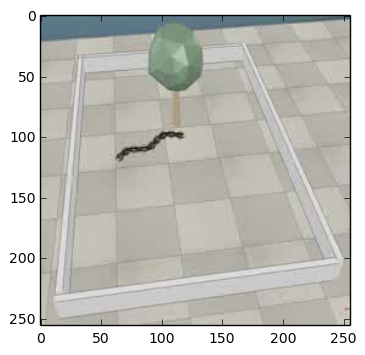

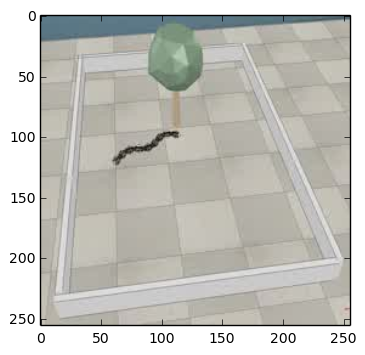

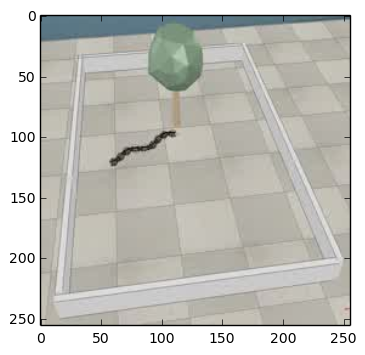

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import time
from matplotlib import image

testPath = "/home/ubuntu/SoftRobotRepresentation/Data/Recording3/5/002510.jpg"
testPath2 = "/home/ubuntu/SoftRobotRepresentation/Data/Recording3/5/002515.jpg"
testPath3 = "/home/ubuntu/SoftRobotRepresentation/Data/Recording3/5/002513.jpg"

im =  image.imread(testPath)
plt.figure()
plt.imshow(im)

im3 =  image.imread(testPath3)
plt.figure()
plt.imshow(im3)

im2 =  image.imread(testPath2)
plt.figure()
plt.imshow(im2)